# Police Priority Calls Analytics in San Diego from 2020-2023 

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Overview

In San Diego, police calls have been an issues over the years. In beginning of 2018, the city had more active crimes around the city. The shocking factor was that the number of police calls just in the 2 months of 2023 increased to the size of 83285 calls to the police. This number is alarming as per day average is around 1100-1200 calls a day. This issue is severe, and more importantly, it has increased is a concern. **With this analysis, we wanted to focus on measuring if components like day of the week, call type, neighborhood, description, disposition, and address played into predicting the priority level of calls** As a result, we have found that there is infact a relationship of these variables that predict priority of calls in around San Diego, and we hope this provides a predictive model to improving reaction speed for SDPD.


# Names
- Shasanka Nudurupati 
- Siddharth Vyasabattu
- Abigail Vargas
- Emily Lam 
- Pulkit Goyal
- John Chou

<a id='research_question'></a>
# Research Question

*Using scientific ananlysis, we want to focus on studying a relationship where day of the week, call type, neighborhood, description, disposition, and address predicte if there is a an influence/correlation for priority of such calls in San Diego from 2020-2023 dataset(s)*

<a id='background'></a>

## Background & Prior Work

The continuous growth of police calls in recent years has led to social order challenges in San Diego. Ever since the rise of COVID-19 on late 2019 , the rise of police calls in San Diego Police department showed a increase in calls. From an average of 23 minutes in 2019 to 21 minutes in 2018 and 28 minutes in 2020 [1]. Although the direct cause of this slowness in time can be based on location of calls around the city and frequency. As San Diego is broken up with 55 zip codes, the process of knowing where the call is coming from and going can cause this time to increase for responders.  

Prior work suggests that the increase of police responses time can be from the type of crime . From the Voice at San Diego,  response time for active domestic violance calls, assualt and indecent exposure incidents rose 27.1 munutes to 49.2 during 2018 to 2022, but the time of mental health crisis increased 50 minutes to 110 minutes [2]. Although the cause of cime can differentiate on priority, but the time for respone to the cime increased dramatically on all cimes. In order to understand this phenomia, the best approach is to use police call service data to use a multi-regression model analysis to predict correlations of call type, disposition, beat, location, and more with priority of cime. This way, this study can help police and local authorities with a better send of where calls are being predicted in coming from and faster way to get to them in a shorter amount of time.

References (include links):
1. Payton, Mari. “San Diego Police Department's Response Times Increased during the Pandemic.” NBC 7 San Diego, NBC San Diego, 17 Feb. 2021, https://www.nbcsandiego.com/news/investigations/san-diego-police-departments-response-times-increased-during-the-pandemic/2524279/. 

2. Halverstadt, Lisa. “San Diego Police Response Times Have Gone up Drastically.” Voice of San Diego, 16 Feb. 2023, https://voiceofsandiego.org/2023/02/15/san-diego-police-response-times-have-gone-up-drastically/. 

# Hypothesis


We believe that there is a relationship between call type, disposition, beat, and location with the priority of the call occurances across San Deigo. The scale of calls will have a positive correlation with call type, disposition, beat, and location. As the increase in the type of cimes in an area can better determine priority of the call.

# Dataset(s)

1. **Dataset Name**: Police Calls in San Diego  (2020)

    **Link to the dataset**: https://data.sandiego.gov/datasets/police-calls-for-service/  
    **Number of observations**: 567290 x 14  
    **Description of the dataset**: This dataset contains the different police calls that San Diego got in the year 2020 

2. **Dataset Name**: Police Calls in San Diego  (2021) 

    **Link to the dataset**: https://data.sandiego.gov/datasets/police-calls-for-service/  
    **Number of observations**: 568947 x 14   
    **Description of the dataset**: This dataset contains the different police calls that San Diego got in the year 2021

3. **Dataset Name**: Police Calls in San Diego  (2022) 

    **Link to the dataset**: https://data.sandiego.gov/datasets/police-calls-for-service/  
    **Number of observations**: 499256 x 14  
    **Description of the dataset**: This dataset contains the different police calls that San Diego got in the year 2022

4. **Dataset Name**: Police Calls in San Diego  (2023) 

    **Link to the dataset**: https://data.sandiego.gov/datasets/police-calls-for-service/  
    **Number of observations**: 83285 x 14   
    **Description of the dataset**: This dataset contains the different police calls that San Diego got in the year 2023

# Setup

In [33]:

import pandas as pd
import numpy as np
import plotly.express as px

# Visualizations 
import seaborn as sns
import matplotlib.pyplot as plt

#Import scipy to gather statistics
from scipy import stats

# Import patsy and statsmodels for regression analysis
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

# For randomness
import random 

# using dask library for faster parallel processing for large datasets
import dask.dataframe as dd

# Example Functions/Classes 
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# Data Cleaning

Describe your data cleaning steps here.

In [2]:
police_calls_2023 = pd.read_csv('Data/pd_calls_for_service_2023_datasd.csv') # has 7.8 MB Data
police_calls_2022 = pd.read_csv('Data/pd_calls_for_service_2022_datasd.csv') # has 47 MB
police_calls_2021 = pd.read_csv('Data/pd_calls_for_service_2021_datasd.csv') # has 53 MB
police_calls_2020 = pd.read_csv('Data/pd_calls_for_service_2020_datasd.csv') # has 53 MB

disp_codes = pd.read_csv('Data/pd_dispo_codes_datasd.csv')
beats = pd.read_csv('Data/pd_beat_codes_list_datasd.csv')
police_calls_2023[police_calls_2023['day_of_week'] == 1]
police_calls_2023.shape

(83285, 14)

In [3]:
police_calls_big_dataset = pd.concat([police_calls_2023, police_calls_2022, police_calls_2021, police_calls_2020])
police_calls_big_dataset = police_calls_big_dataset.merge(disp_codes, left_on= 'disposition', right_on= 'dispo_code')
police_calls_big_dataset = police_calls_big_dataset.merge(beats)

# Focusing out dataset on the columns that are best measurements for Linear/correlation predictions

police_calls_big_dataset = police_calls_big_dataset[['date_time', 'day_of_week', 'call_type', 'disposition', 'priority', 'description', 'neighborhood', 'address_sfx_primary']]
police_calls_big_dataset = police_calls_big_dataset.sort_values(by = 'priority', ascending = False)

In [ ]:
police_calls_big_dataset

,date_time,day_of_week,call_type,disposition,priority,description,neighborhood,address_sfx_primary
1588528,2020-12-18 16:05:59,6,530,R,9,REPORT,Cherokee Point,ST
1067134,2021-06-05 13:26:54,7,10852R,R,9,REPORT,Bay Park,ST
890896,2021-10-13 12:10:07,4,653M,K,9,NO REPORT REQUIRED,Fairmount Village,ST
1067142,2021-06-14 14:05:29,2,488R,R,9,REPORT,Bay Park,ST
1428628,2021-10-06 16:24:28,4,530,R,9,REPORT,Chollas Creek,AVE
...,...,...,...,...,...,...,...,...
1156618,2021-01-28 09:13:16,5,1183,R,0,REPORT,Golden Hill,ST
870004,2021-02-01 07:11:31,2,245,R,0,REPORT,North Park,ST
203142,2020-06-29 17:24:04,2,1183,K,0,NO REPORT REQUIRED,Pacific Beach,ST
1315951,2022-05-06 15:27:11,6,11-8,K,0,NO REPORT REQUIRED,Teralta West,ST


# Data Analysis & Results

## Explore the dataset

In [5]:
police_calls_big_dataset.head()

,date_time,day_of_week,call_type,disposition,priority,description,neighborhood,address_sfx_primary
1588528,2020-12-18 16:05:59,6,530,R,9,REPORT,Cherokee Point,ST
1067134,2021-06-05 13:26:54,7,10852R,R,9,REPORT,Bay Park,ST
890896,2021-10-13 12:10:07,4,653M,K,9,NO REPORT REQUIRED,Fairmount Village,ST
1067142,2021-06-14 14:05:29,2,488R,R,9,REPORT,Bay Park,ST
1428628,2021-10-06 16:24:28,4,530,R,9,REPORT,Chollas Creek,AVE


In [6]:
police_calls_big_dataset.tail()

,date_time,day_of_week,call_type,disposition,priority,description,neighborhood,address_sfx_primary
1156618,2021-01-28 09:13:16,5,1183,R,0,REPORT,Golden Hill,ST
870004,2021-02-01 07:11:31,2,245,R,0,REPORT,North Park,ST
203142,2020-06-29 17:24:04,2,1183,K,0,NO REPORT REQUIRED,Pacific Beach,ST
1315951,2022-05-06 15:27:11,6,11-8,K,0,NO REPORT REQUIRED,Teralta West,ST
98443,2021-03-16 16:41:28,3,10852,K,0,NO REPORT REQUIRED,East Village,AVE


In [7]:
police_calls_big_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686084 entries, 1588528 to 98443
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   date_time            1686084 non-null  object
 1   day_of_week          1686084 non-null  int64 
 2   call_type            1684494 non-null  object
 3   disposition          1686084 non-null  object
 4   priority             1686084 non-null  int64 
 5   description          1686084 non-null  object
 6   neighborhood         1686084 non-null  object
 7   address_sfx_primary  1558164 non-null  object
dtypes: int64(2), object(6)
memory usage: 115.8+ MB


### Lets get a sense of the dataset/Data Visualization:

In [8]:
police_calls_big_dataset.describe()

,day_of_week,priority
count,1.686084e+06,1.686084e+06
mean,4.048520e+00,2.172195e+00
std,1.959725e+00,1.359285e+00
min,1.000000e+00,0.000000e+00
25%,2.000000e+00,1.000000e+00
50%,4.000000e+00,2.000000e+00
75%,6.000000e+00,3.000000e+00
max,7.000000e+00,9.000000e+00


In [9]:
## Number of nulls in dataset
police_calls_big_dataset.isnull().sum()

date_time                   0
day_of_week                 0
call_type                1590
disposition                 0
priority                    0
description                 0
neighborhood                0
address_sfx_primary    127920
dtype: int64

In [10]:
## Pull up all the ones that are null call types 
police_calls_big_dataset.groupby(by=["call_type"]).sum()

,day_of_week,priority
call_type,,
1016,71515,33844
1016P,49,22
1016PT,288,114
1016QC,171,78
1021,58426,43502
...,...,...
TLO,918,229
TP,1918,0
TRO,9398,6981


In [11]:
# checking the Data type
police_calls_big_dataset.dtypes

date_time              object
day_of_week             int64
call_type              object
disposition            object
priority                int64
description            object
neighborhood           object
address_sfx_primary    object
dtype: object

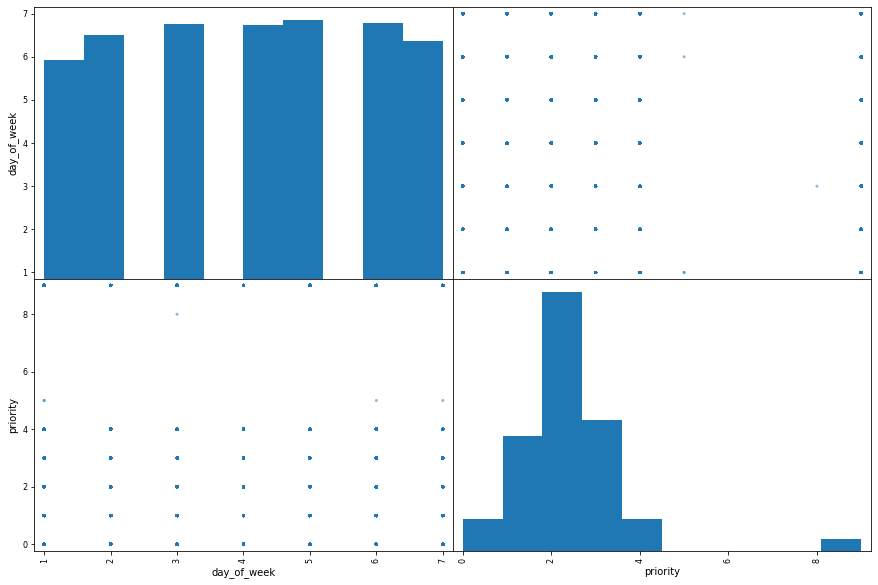

In [12]:
# First look at the scatter matrix 
scatter = pd.plotting.scatter_matrix(police_calls_big_dataset, figsize= (15,10))

<AxesSubplot:xlabel='day_of_week'>

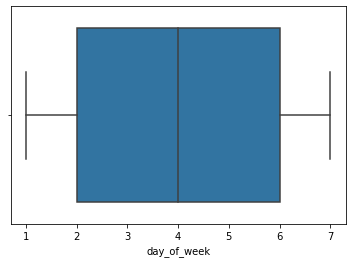

In [13]:
# look at the day of week  distribution 
sns.boxplot(x=police_calls_big_dataset['day_of_week'])

In [14]:
police_calls_big_dataset.describe()

,day_of_week,priority
count,1.686084e+06,1.686084e+06
mean,4.048520e+00,2.172195e+00
std,1.959725e+00,1.359285e+00
min,1.000000e+00,0.000000e+00
25%,2.000000e+00,1.000000e+00
50%,4.000000e+00,2.000000e+00
75%,6.000000e+00,3.000000e+00
max,7.000000e+00,9.000000e+00


In [15]:
police_calls_big_dataset.median()

C:\Users\siddu\AppData\Local\Temp\ipykernel_15256\1663241893.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  police_calls_big_dataset.median()


day_of_week    4.0
priority       2.0
dtype: float64

##  Linear Regression Model for predicting call volume at a given hour of the day 

In [16]:
#Main dataframe
df = police_calls_big_dataset 
df

,date_time,day_of_week,call_type,disposition,priority,description,neighborhood,address_sfx_primary
1588528,2020-12-18 16:05:59,6,530,R,9,REPORT,Cherokee Point,ST
1067134,2021-06-05 13:26:54,7,10852R,R,9,REPORT,Bay Park,ST
890896,2021-10-13 12:10:07,4,653M,K,9,NO REPORT REQUIRED,Fairmount Village,ST
1067142,2021-06-14 14:05:29,2,488R,R,9,REPORT,Bay Park,ST
1428628,2021-10-06 16:24:28,4,530,R,9,REPORT,Chollas Creek,AVE
...,...,...,...,...,...,...,...,...
1156618,2021-01-28 09:13:16,5,1183,R,0,REPORT,Golden Hill,ST
870004,2021-02-01 07:11:31,2,245,R,0,REPORT,North Park,ST
203142,2020-06-29 17:24:04,2,1183,K,0,NO REPORT REQUIRED,Pacific Beach,ST
1315951,2022-05-06 15:27:11,6,11-8,K,0,NO REPORT REQUIRED,Teralta West,ST


In [17]:
#converting the values in date_time column to datetime objects
df['date_time'] = pd.to_datetime(df['date_time']) 
df

,date_time,day_of_week,call_type,disposition,priority,description,neighborhood,address_sfx_primary
1588528,2020-12-18 16:05:59,6,530,R,9,REPORT,Cherokee Point,ST
1067134,2021-06-05 13:26:54,7,10852R,R,9,REPORT,Bay Park,ST
890896,2021-10-13 12:10:07,4,653M,K,9,NO REPORT REQUIRED,Fairmount Village,ST
1067142,2021-06-14 14:05:29,2,488R,R,9,REPORT,Bay Park,ST
1428628,2021-10-06 16:24:28,4,530,R,9,REPORT,Chollas Creek,AVE
...,...,...,...,...,...,...,...,...
1156618,2021-01-28 09:13:16,5,1183,R,0,REPORT,Golden Hill,ST
870004,2021-02-01 07:11:31,2,245,R,0,REPORT,North Park,ST
203142,2020-06-29 17:24:04,2,1183,K,0,NO REPORT REQUIRED,Pacific Beach,ST
1315951,2022-05-06 15:27:11,6,11-8,K,0,NO REPORT REQUIRED,Teralta West,ST


In [18]:
df['hour'] = df['date_time'].dt.hour #Extracting the hour from the datatime objects in date_time column
df

,date_time,day_of_week,call_type,disposition,priority,description,neighborhood,address_sfx_primary,hour
1588528,2020-12-18 16:05:59,6,530,R,9,REPORT,Cherokee Point,ST,16
1067134,2021-06-05 13:26:54,7,10852R,R,9,REPORT,Bay Park,ST,13
890896,2021-10-13 12:10:07,4,653M,K,9,NO REPORT REQUIRED,Fairmount Village,ST,12
1067142,2021-06-14 14:05:29,2,488R,R,9,REPORT,Bay Park,ST,14
1428628,2021-10-06 16:24:28,4,530,R,9,REPORT,Chollas Creek,AVE,16
...,...,...,...,...,...,...,...,...,...
1156618,2021-01-28 09:13:16,5,1183,R,0,REPORT,Golden Hill,ST,9
870004,2021-02-01 07:11:31,2,245,R,0,REPORT,North Park,ST,7
203142,2020-06-29 17:24:04,2,1183,K,0,NO REPORT REQUIRED,Pacific Beach,ST,17
1315951,2022-05-06 15:27:11,6,11-8,K,0,NO REPORT REQUIRED,Teralta West,ST,15


In [22]:
 #Using a groupby transform the count the number of calls at a particular hour
df['calls_at_hour'] = df.groupby('hour')['date_time'].transform('count')
df

,date_time,day_of_week,call_type,disposition,priority,description,neighborhood,address_sfx_primary,hour,calls_at_hour
1588528,2020-12-18 16:05:59,6,530,R,9,REPORT,Cherokee Point,ST,16,87246
1067134,2021-06-05 13:26:54,7,10852R,R,9,REPORT,Bay Park,ST,13,83222
890896,2021-10-13 12:10:07,4,653M,K,9,NO REPORT REQUIRED,Fairmount Village,ST,12,87132
1067142,2021-06-14 14:05:29,2,488R,R,9,REPORT,Bay Park,ST,14,85182
1428628,2021-10-06 16:24:28,4,530,R,9,REPORT,Chollas Creek,AVE,16,87246
...,...,...,...,...,...,...,...,...,...,...
1156618,2021-01-28 09:13:16,5,1183,R,0,REPORT,Golden Hill,ST,9,88730
870004,2021-02-01 07:11:31,2,245,R,0,REPORT,North Park,ST,7,80151
203142,2020-06-29 17:24:04,2,1183,K,0,NO REPORT REQUIRED,Pacific Beach,ST,17,79816
1315951,2022-05-06 15:27:11,6,11-8,K,0,NO REPORT REQUIRED,Teralta West,ST,15,86708


In [56]:
# Splitting the data into training and testing data 
X = df[['hour', 'day_of_week']]
y = df['calls_at_hour']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [57]:
# Making the pipeline
pl_calls = Pipeline([
    ('lin-reg', LinearRegression())])

In [58]:
pl_calls.fit(X_train, y_train) #Fitting the pipeline

Pipeline(steps=[('lin-reg', LinearRegression())])

In [59]:
pred = pl_calls.predict(X_test) #Getting a prediction from the testing data

In [60]:
# Function for Root Mean Squared Error
def rmse(pred, y):
    mse = mean_squared_error(pred, y_test) 
    return np.sqrt(mse)

In [61]:
pred

array([83957.34576559, 75449.28280203, 77416.93911572, ...,
       68243.76684971, 83866.28323576, 71605.03270447])

In [62]:
y_test

144209     75006
1087570    87132
929057     85182
451764     76102
630942     90356
           ...  
1097976    87246
797583     85182
1207707    33233
922339     75006
253310     87795
Name: calls_at_hour, Length: 337217, dtype: int64

In [63]:
#Finding RMSE
rmse(pred, y_test)

15103.009378194542

In [64]:
df['calls_at_hour'].describe()

count    1.686084e+06
mean     7.606590e+04
std      1.646352e+04
min      2.723800e+04
25%      7.381700e+04
50%      8.015100e+04
75%      8.724600e+04
max      9.520200e+04
Name: calls_at_hour, dtype: float64

In [67]:
df['calls_at_hour'].max() - df['calls_at_hour'].min() #Finding range of the column

67964

In [68]:
# Since the RMSE is so high considering the range of the calls, this is not a great model. 

## Decision tree model to predict priority from all the other columns

In [69]:
# Dropping the date_time column because we will be using the hour column for predicting priority. 
df = df.drop('date_time', axis = 1) 

In [31]:
# Converting call_type columns to string type, so we can use One hot encoding on it.
df['call_type'] = df['call_type'].astype(str)

In [70]:
#Sampling only 20% of the data to train the model faster
df_sampled = df.sample(n=int(df.shape[0]*.2), random_state=42) 

In [71]:
# Splitting the data into training and testing sets
X = df_sampled.drop('priority', axis = 1)
y = df_sampled['priority']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [72]:
# Making a pre-processor for the pipeline, transforming 'call_type', 'disposition', 'description', 'neighborhood',
# and 'address_sfx_primary columns using onehotencoding, 'calls_at_hour' and 'hour' into a more standardized format
# using quantiletransformer to help capture the relationship more accurately, letting the other columns pass through.

preproc = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'),
     ['call_type', 'disposition', 'description', 'neighborhood', 'address_sfx_primary']),
    ('quantile', QuantileTransformer(), ['calls_at_hour', 'hour'])
], remainder = 'passthrough')
preproc

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe', OneHotEncoder(handle_unknown='ignore'),
                                 ['call_type', 'disposition', 'description',
                                  'neighborhood', 'address_sfx_primary']),
                                ('quantile', QuantileTransformer(),
                                 ['calls_at_hour', 'hour'])])

In [73]:
# Making the pipeline using the above pre-processor and a DecisionTreeClassifier model
pl_priority = Pipeline([('preproc', preproc), ('dec-tree', DecisionTreeClassifier())])

In [74]:
#Fitting the pipeline
pl_priority.fit(X_train, y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['call_type', 'disposition',
                                                   'description',
                                                   'neighborhood',
                                                   'address_sfx_primary']),
                                                 ('quantile',
                                                  QuantileTransformer(),
                                                  ['calls_at_hour', 'hour'])])),
                ('dec-tree', DecisionTreeClassifier())])

In [75]:
#Getting a prediction out of the testing data
pred = pl_priority.predict(X_test)

In [76]:
#Finding the accuracy score
metrics.accuracy_score(pred, y_test)

0.9256420141154142

In [75]:
# We are able to get predictions using this model with a ~93% accuracy.

# Evaluating Priority by Variable

In [55]:
df

,day_of_week,call_type,disposition,priority,description,neighborhood,address_sfx_primary,hour,calls_at_hour
1588528,6,530,R,9,REPORT,Cherokee Point,ST,16,87246
1067134,7,10852R,R,9,REPORT,Bay Park,ST,13,83222
890896,4,653M,K,9,NO REPORT REQUIRED,Fairmount Village,ST,12,87132
1067142,2,488R,R,9,REPORT,Bay Park,ST,14,85182
1428628,4,530,R,9,REPORT,Chollas Creek,AVE,16,87246
...,...,...,...,...,...,...,...,...,...
1156618,5,1183,R,0,REPORT,Golden Hill,ST,9,88730
870004,2,245,R,0,REPORT,North Park,ST,7,80151
203142,2,1183,K,0,NO REPORT REQUIRED,Pacific Beach,ST,17,79816
1315951,6,11-8,K,0,NO REPORT REQUIRED,Teralta West,ST,15,86708


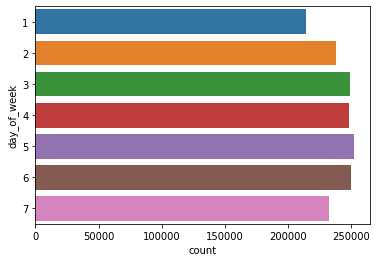

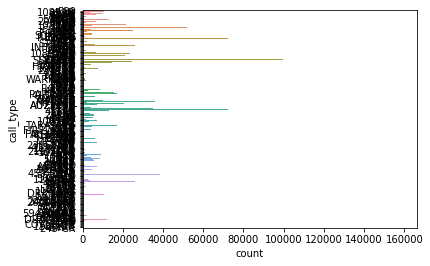

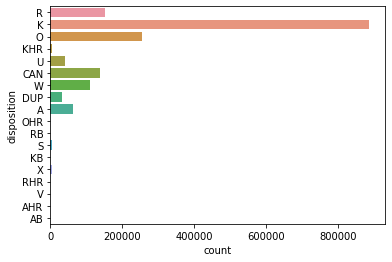

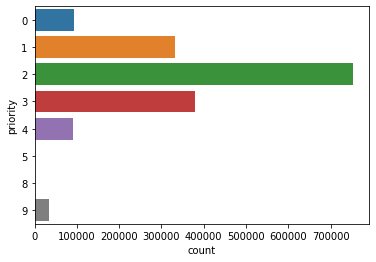

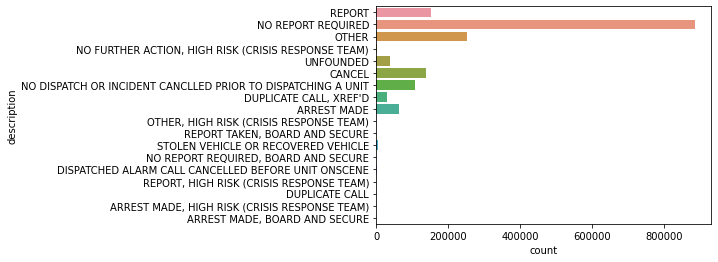

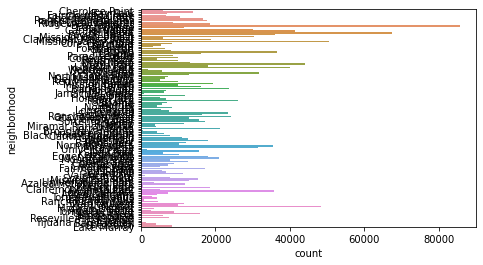

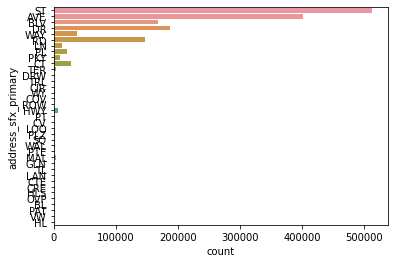

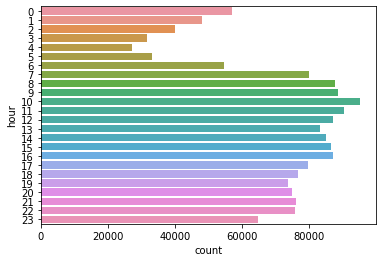

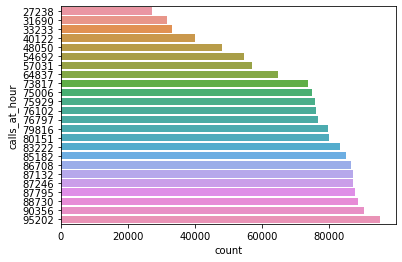

In [56]:
for col in df.columns:
    plt.figure()  # create a new plot for each column
    sns.countplot(y=col, data=df)
    plt.show()

# Emily OLS + AIC

In [60]:
def mod_aic(df):

    aic_list = []
    
    for col in df.columns:
        X = df[col]
        model = smf.ols(data=df, formula='priority~X').fit()        
 
        aic = round(model.aic,2)
        aic_list.append(aic)
        
        print(f"This is the AIC for {col}: {aic}")

In [61]:
#The AIC of each respective variable
aic_reader= mod_aic(df)
aic_reader

This is the AIC for day_of_week: 5820018.74
This is the AIC for call_type: 2559326.14
This is the AIC for disposition: 5750091.43
This is the AIC for priority: -79033987.03
This is the AIC for description: 5750091.43
This is the AIC for neighborhood: 5806076.02
This is the AIC for address_sfx_primary: 5361136.16
This is the AIC for hour: 5814998.22
This is the AIC for calls_at_hour: 5812270.91


In [62]:
df.columns

Index(['day_of_week', 'call_type', 'disposition', 'priority', 'description',
       'neighborhood', 'address_sfx_primary', 'hour', 'calls_at_hour'],
      dtype='object')

In [63]:
#Dataframe with the AIC for each variable
aic_df= pd.DataFrame({
 
    'variable':['day_of_week', 'call_type', 'disposition', 'description',
       'neighborhood', 'address_sfx_primary', 'hour', 'calls_at_hour'],
    'aic': [5820018.74, 2559326.14, 5750091.43,  5750091.43, 5806076.02, 5361136.16, 5814998.22, 5812270.91]
})
aic_df

,variable,aic
0,day_of_week,5820018.74
1,call_type,2559326.14
2,disposition,5750091.43
3,description,5750091.43
4,neighborhood,5806076.02
5,address_sfx_primary,5361136.16
6,hour,5814998.22
7,calls_at_hour,5812270.91


In [64]:
#The AIC df rearranged lowest to highest

#A lower AIC is better 
sorted_aic_df= aic_df.sort_values(by='aic', ascending=True)
sorted_aic_df

,variable,aic
1,call_type,2559326.14
5,address_sfx_primary,5361136.16
2,disposition,5750091.43
3,description,5750091.43
4,neighborhood,5806076.02
7,calls_at_hour,5812270.91
6,hour,5814998.22
0,day_of_week,5820018.74


# Ethics & Privacy

 One ethical concern that arises in this project is the potential for bias in the data. For example, certain neighborhoods may be overrepresented in the data due to a higher number of police calls, which can lead to the prioritization of calls from those neighborhoods over others. Additionally, there may be biases in the way that certain types of calls are classified or prioritized, which can have negative consequences for certain groups of people.

 It is important to acknowledge these biases and take steps to mitigate them throughout the data science process. This includes carefully selecting and cleaning the data, using unbiased algorithms and models, and regularly reviewing and monitoring the results to ensure that they are fair and accurate. Additionally, it is important to consider the potential impact of the analysis on different communities and to work to minimize any negative consequences.

# Conclusion & Discussion

The present study aimed to investigate the existence of specific indicators related to the responsiveness rates of the San Diego police department. To accomplish this objective, we analyzed the data obtained from the department concerning the calls received during the period spanning from 2019 to 2023, identifying relevant variables such as call_type, neighborhood, description, etcetera.

In an effort to identify the most significant factor that affected the responsiveness rate of the police, we employed the Ordinary Least Squares regression analysis. This method allowed us to determine which variables carried the most weight in our observations. To prevent overfitting and to evaluate each variable's performance, we calculated the Akaike Information Criterion (AIC) for each model, enabling us to identify the most indicative model for our predictor.

The results of our analysis revealed that the call_type variable was the most significant determinant of responsiveness rate, while the day_of_week variable exhibited the least impact. Specifically, we observed that the AIC for call_type was considerably lower than that of the other variables. In terms of weighted predictors, the order was as follows: call_type, address_sfx_primary, disposition, description, neighborhood, calls_at_hour, hour, and day_of_week.

## Video submission for the project
Here is the link to view the video https://drive.google.com/file/d/1srvbPrun7pXnmpE6j4WbCj2HgwygtGey/view?usp=sharing

# Team Contributions

*Specify who in your group worked on which parts of the project.*
- Shasanka Nudurupati (Overview/Research Topic, Background, Datasets, )
- Siddharth Vyasabattu (Datasets,Datacleaning, EDA, )
- Abigail Vargas (Video)
- Emily Lam ( OLS, AIC, Conclusion& Discussion)
- Pulkit Goyal (Ethics & privacy)
- John Chou (Video)